### Importing Libraries

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing the train test split function
from sklearn.model_selection import train_test_split

### Load the data

In [2]:
data = pd.read_csv('cleaned_loan.csv')
data.shape

(4368, 79)

In [3]:
data.head()

,Unnamed: 0,loannumber,loanamount,totaldue,termdays,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,creationdate_dow,...,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank
0,0,12.0,30000.0,34500.0,30.0,0.0,3.432010,6.433055,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2.0,15000.0,17250.0,30.0,1.0,3.885298,7.320700,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,2,7.0,20000.0,22250.0,15.0,0.0,11.139350,10.292041,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,10000.0,11500.0,15.0,1.0,3.985770,7.491708,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,4,9.0,40000.0,44000.0,30.0,0.0,7.457913,9.076574,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['Unnamed: 0', 'loannumber', 'loanamount', 'totaldue', 'termdays',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'employment_status_clients', 'creationdate_dow', 'additional_charges',
       'is_referred', 'age', 'ploan_loanamount_mean', 'ploan_loanamount_min',
       'ploan_loanamount_25%', 'ploan_loanamount_50%', 'ploan_loanamount_75%',
       'ploan_loanamount_max', 'ploan_totaldue_mean', 'ploan_totaldue_min',
       'ploan_totaldue_25%', 'ploan_totaldue_50%', 'ploan_totaldue_75%',
       'ploan_totaldue_max', 'ploan_termdays_mean', 'ploan_termdays_min',
       'ploan_termdays_25%', 'ploan_termdays_50%', 'ploan_termdays_75%',
       'ploan_termdays_max', 'ploan_approval_time_mean',
       'ploan_approval_time_min', 'ploan_approval_time_25%',
       'ploan_approval_time_50%', 'ploan_approval_time_75%',
       'ploan_approval_time_max', 'ploan_return_days_mean_x',
       'ploan_return_days_min_x', 'ploan_return_days_25%_x',
       'ploan_return_days_50%_x',

In [5]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
data.columns

Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'employment_status_clients',
       'creationdate_dow', 'additional_charges', 'is_referred', 'age',
       'ploan_loanamount_mean', 'ploan_loanamount_min', 'ploan_loanamount_25%',
       'ploan_loanamount_50%', 'ploan_loanamount_75%', 'ploan_loanamount_max',
       'ploan_totaldue_mean', 'ploan_totaldue_min', 'ploan_totaldue_25%',
       'ploan_totaldue_50%', 'ploan_totaldue_75%', 'ploan_totaldue_max',
       'ploan_termdays_mean', 'ploan_termdays_min', 'ploan_termdays_25%',
       'ploan_termdays_50%', 'ploan_termdays_75%', 'ploan_termdays_max',
       'ploan_approval_time_mean', 'ploan_approval_time_min',
       'ploan_approval_time_25%', 'ploan_approval_time_50%',
       'ploan_approval_time_75%', 'ploan_approval_time_max',
       'ploan_return_days_mean_x', 'ploan_return_days_min_x',
       'ploan_return_days_25%_x', 'ploan_return_days_50%_x',
       'ploan_return

### Segregating variables: Independent and Dependent Variables

In [7]:
#seperating independent and dependent variables
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})
x.shape, y.shape

((4368, 77), (4368,))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, test_size=0.2, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

### Implementing KNN Classifier

In [9]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [10]:
# Creating instance of KNN
clf = KNN(n_neighbors = 17)

# Fitting the model
clf.fit(x_train, y_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x_test)
k = f1_score(test_predict, y_test)
print('Test F1 Score    ', k )

Test F1 Score     0.2280701754385965


In [11]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(x_train, y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x_test)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [12]:
#Defining K range
k = range(6,150)

In [13]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

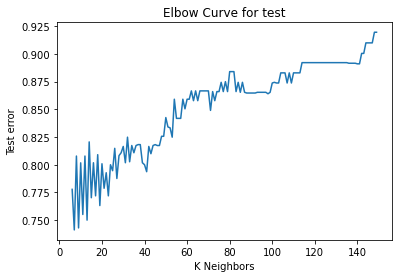

In [27]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [45]:
# Creating instance of KNN
clf = KNN(n_neighbors =7)

# Fitting the model
clf.fit(x_train, y_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x_test)
k = f1_score(test_predict, y_test)
print('Test F1 Score  ', k )

Test F1 Score   0.25882352941176473


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       809
           1       0.17      0.51      0.26        65

    accuracy                           0.78       874
   macro avg       0.56      0.66      0.57       874
weighted avg       0.90      0.78      0.83       874



# APPLY FORWARD FEATURE ENGINEERING.

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [51]:
sfs_forward=sfs(clf,k_features=20,forward=True,verbose=1,scoring='f1')

In [53]:
sfs_forward=sfs_forward.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   14.0s finished
Features: 1/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   12.8s finished
Features: 2/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   14.2s finished
Features: 3/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   14.5s finished
Features: 4/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   14.6s finished
Features: 5/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   15.3s finished
Features: 6/20[Parallel(

In [54]:
feat_names_forward=list(sfs_forward.k_feature_names_)
print(feat_names_forward)

['loanamount', 'bank_account_type', 'ploan_loanamount_75%', 'ploan_loanamount_max', 'ploan_termdays_max', 'ploan_first_return_days_mean', 'ploan_first_return_days_50%', 'bank_name_clients_Diamond Bank', 'bank_name_clients_EcoBank', 'bank_name_clients_FCMB', 'bank_name_clients_Fidelity Bank', 'bank_name_clients_Heritage Bank', 'bank_name_clients_Keystone Bank', 'bank_name_clients_Stanbic IBTC', 'bank_name_clients_Standard Chartered', 'bank_name_clients_Sterling Bank', 'bank_name_clients_Union Bank', 'bank_name_clients_Unity Bank', 'bank_name_clients_Wema Bank', 'bank_name_clients_Zenith Bank']


In [55]:
Loan_new_forward=data[feat_names_forward]
Loan_new_forward['good_bad_flag']=data['good_bad_flag']

In [56]:
Loan_new_forward

,loanamount,bank_account_type,ploan_loanamount_75%,ploan_loanamount_max,ploan_termdays_max,ploan_first_return_days_mean,ploan_first_return_days_50%,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,bank_name_clients_FCMB,...,bank_name_clients_Heritage Bank,bank_name_clients_Keystone Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,good_bad_flag
0,30000.0,0.0,20000.0,30000.0,30.0,0.000000,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Good
1,15000.0,1.0,24375.0,30000.0,30.0,1.071429,0.5,0,0,0,...,0,0,0,0,0,0,0,0,0,Good
2,20000.0,0.0,10000.0,10000.0,30.0,-1.833333,2.5,0,1,0,...,0,0,0,0,0,0,0,0,0,Good
3,10000.0,1.0,10000.0,10000.0,30.0,-8.500000,-8.5,0,0,0,...,0,0,0,0,0,0,0,0,0,Good
4,40000.0,0.0,22500.0,30000.0,60.0,2.125000,0.5,0,0,0,...,0,0,0,0,0,0,0,0,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,10000.0,1.0,10000.0,10000.0,30.0,-6.000000,-6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bad
4364,10000.0,1.0,10000.0,10000.0,30.0,3.000000,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Bad
4365,10000.0,1.0,10000.0,10000.0,15.0,-9.000000,-9.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bad
4366,10000.0,1.0,10000.0,10000.0,30.0,-1.000000,-1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bad


In [57]:
#seperating independent and dependent variables
x1 = Loan_new_forward.drop(['good_bad_flag'], axis=1)
y1 = Loan_new_forward['good_bad_flag'].replace({'Good':0, 'Bad':1})
x1.shape, y1.shape

((4368, 20), (4368,))

In [58]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=101, test_size=0.2, stratify=y1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_train_scaled = scaler.fit_transform(x1_train)
x1_train = pd.DataFrame(x1_train_scaled, columns=x1_train.columns)

x1_test_scaled = scaler.transform(x1_test)
x1_test = pd.DataFrame(x1_test_scaled, columns=x1_test.columns)

In [59]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(x1_train, y1_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x1_test)
k = f1_score(test_predict, y1_test)
print('Test F1 Score    ', k )

Test F1 Score     0.3018867924528302


In [61]:
def Elbow1(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(x1_train, y1_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x1_test)
        tmp = f1_score(tmp,y1_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [63]:
#Defining K range
k = range(6,150)

In [64]:
# calling above defined function
test = Elbow1(k)

Text(0.5, 1.0, 'Elbow Curve for test')

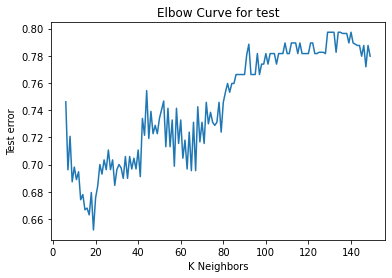

In [65]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [66]:
# Creating instance of KNN
clf = KNN(n_neighbors = 19)

# Fitting the model
clf.fit(x1_train, y1_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x1_test)
k = f1_score(test_predict, y1_test)
print('Test F1 Score    ', k )

Test F1 Score     0.34814814814814815


--with first 10 features

In [67]:
sfs_forward=sfs(clf,k_features=10,forward=True,verbose=1,scoring='f1')

In [68]:
sfs_forward=sfs_forward.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   15.1s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   11.6s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   12.2s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   13.6s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   13.9s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   14.4s finished
Features: 6/10[Parallel(

In [72]:
feat_names_forward1=list(sfs_forward.k_feature_names_)
print(feat_names_forward)

['bank_account_type', 'ploan_loanamount_min', 'ploan_loanamount_25%', 'ploan_loanamount_75%', 'ploan_totaldue_max', 'ploan_approval_time_max', 'ploan_first_return_days_50%', 'bank_name_clients_Stanbic IBTC', 'bank_name_clients_Union Bank', 'bank_name_clients_Wema Bank']


In [73]:
Loan_new_forward_10=data[feat_names_forward1]
Loan_new_forward_10['good_bad_flag']=data['good_bad_flag']

In [74]:
#seperating independent and dependent variables
x2 = Loan_new_forward_10.drop(['good_bad_flag'], axis=1)
y2 = Loan_new_forward_10['good_bad_flag'].replace({'Good':0, 'Bad':1})
x2.shape, y2.shape

((4368, 10), (4368,))

In [75]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=101, test_size=0.2, stratify=y2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x2_train_scaled = scaler.fit_transform(x2_train)
x2_train = pd.DataFrame(x2_train_scaled, columns=x2_train.columns)

x2_test_scaled = scaler.transform(x2_test)
x2_test = pd.DataFrame(x2_test_scaled, columns=x2_test.columns)

In [76]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(x2_train, y2_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x2_test)
k = f1_score(test_predict, y2_test)
print('Test F1 Score    ', k )

Test F1 Score     0.26717557251908397


In [77]:
def Elbow2(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(x2_train, y2_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x2_test)
        tmp = f1_score(tmp,y2_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [78]:
#Defining K range
k = range(6,150)

In [79]:
# calling above defined function
test = Elbow2(k)

Text(0.5, 1.0, 'Elbow Curve for test')

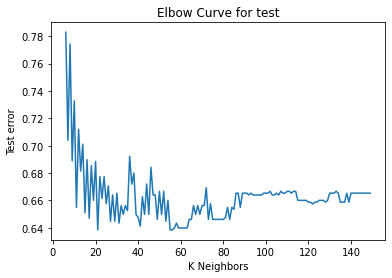

In [80]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [81]:
# Creating instance of KNN
clf = KNN(n_neighbors = 20)

# Fitting the model
clf.fit(x1_train, y1_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x1_test)
k = f1_score(test_predict, y1_test)
print('Test F1 Score    ', k )

Test F1 Score     0.32452830188679244


--with 30 features

In [82]:
sfs_forward=sfs(clf,k_features=30,forward=True,verbose=1,scoring='f1')

In [83]:
sfs_forward=sfs_forward.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   15.3s finished
Features: 1/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   12.1s finished
Features: 2/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   12.3s finished
Features: 3/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   13.8s finished
Features: 4/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   14.7s finished
Features: 5/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   14.3s finished
Features: 6/30[Parallel(

In [87]:
feat_names_forward3=list(sfs_forward.k_feature_names_)
print(feat_names_forward3)

['loanamount', 'totaldue', 'termdays', 'bank_account_type', 'employment_status_clients', 'additional_charges', 'ploan_loanamount_mean', 'ploan_loanamount_min', 'ploan_loanamount_25%', 'ploan_loanamount_50%', 'ploan_loanamount_75%', 'ploan_loanamount_max', 'ploan_approval_time_min', 'ploan_approval_time_25%', 'ploan_approval_time_50%', 'ploan_approval_time_75%', 'ploan_first_return_days_50%', 'bank_name_clients_Diamond Bank', 'bank_name_clients_EcoBank', 'bank_name_clients_Fidelity Bank', 'bank_name_clients_Heritage Bank', 'bank_name_clients_Keystone Bank', 'bank_name_clients_Skye Bank', 'bank_name_clients_Stanbic IBTC', 'bank_name_clients_Standard Chartered', 'bank_name_clients_Sterling Bank', 'bank_name_clients_Union Bank', 'bank_name_clients_Unity Bank', 'bank_name_clients_Wema Bank', 'bank_name_clients_Zenith Bank']


In [88]:
Loan_new_forward_30=data[feat_names_forward3]
Loan_new_forward_30['good_bad_flag']=data['good_bad_flag']

In [89]:
#seperating independent and dependent variables
x1 = Loan_new_forward_30.drop(['good_bad_flag'], axis=1)
y1 = Loan_new_forward_30['good_bad_flag'].replace({'Good':0, 'Bad':1})
x1.shape, y1.shape

((4368, 30), (4368,))

In [92]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x1, y1, random_state=101, test_size=0.2, stratify=y1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x3_train_scaled = scaler.fit_transform(x3_train)
x3_train = pd.DataFrame(x3_train_scaled, columns=x3_train.columns)

x3_test_scaled = scaler.transform(x3_test)
x3_test = pd.DataFrame(x3_test_scaled, columns=x3_test.columns)

In [93]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(x3_train, y3_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x3_test)
k = f1_score(test_predict, y3_test)
print('Test F1 Score    ', k )

Test F1 Score     0.2258064516129032


In [101]:
def Elbow3(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(x3_train, y3_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x3_test)
        tmp = f1_score(tmp,y3_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [102]:
#Defining K range
k = range(6,150)

In [103]:
# calling above defined function
test = Elbow3(k)

Text(0.5, 1.0, 'Elbow Curve for test')

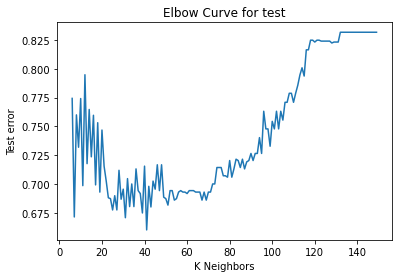

In [104]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [105]:
# Creating instance of KNN
clf = KNN(n_neighbors = 40)

# Fitting the model
clf.fit(x3_train, y3_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x3_test)
k = f1_score(test_predict, y3_test)
print('Test F1 Score    ', k )

Test F1 Score     0.28451882845188287
